# Problem Set 1

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:      7.29.0 (need at least 1.0)
Numpy version:        1.20.3 (need at least 1.7.1)
SciPy version:         1.7.1 (need at least 0.12.0)
Pandas version:        1.3.4 (need at least 0.11.0)
Maplotlib version:     3.4.3 (need at least 1.2.1)
Scikit-Learn version: 0.24.2 (need at least 0.13.1)


---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set]( https://archive.ics.uci.edu/ml/machine-learning-databases/housing/).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

You can read more about the dataset [here](http://lib.stat.cmu.edu/datasets/boston)

Use the following commands to load the dataset:


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
# print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [4]:
boston = pd.DataFrame(bdata.data)


In [5]:
boston.columns = bdata.feature_names[:]
print(boston.shape)

(506, 13)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [6]:
#1.1.1: How many different variables are there in the dataset, and how many different observations?

#SOLUTION 1: printing the shape of the boston dataframe shows the number of rows (observations)
# and the number of columns (variables/features)
print(f"The nr. of variables is {boston.shape[1]} (+ 1 for the target column) and the nr. of observations is {boston.shape[0]}")

#SOLUTION 2: alternatively see the contents of the boston dataframe and we can notice the number of rows & columns 
boston

The nr. of variables is 13 (+ 1 for the target column) and the nr. of observations is 506


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
#1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River?

#SOLUTION 1
sum(boston['CHAS']==1) #the number of times that 1s occur in the CHAS column (35 times)

35

In [8]:
#SOLUTION 2
boston['CHAS'].value_counts() #the number of times that 1s occur in the CHAS column (35 times)

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [9]:
#1.1.3: Show that dataset does not contain any missing values.
boston.isnull().sum() #shows the total number of zero values in each column

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [10]:
#1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

#add the target observations in our dataframe (median housing prices)
boston['MEDV'] = bdata.target
max_MEDV = max(boston['MEDV']) #find the highest MEDV
nr_of_highest_MEDV =sum(boston['MEDV']==max_MEDV) #find the number of times this max occurs
print(f"The highest median housing price is ${max_MEDV*1000} and occurs in {nr_of_highest_MEDV} neighborhoods")
#SOLUTION: Display a subset of the boston dataframe with the max MEDV and store it to the df dataframe
df = boston.sort_values(by=['MEDV'], ascending=False).head(nr_of_highest_MEDV)
#Since 16 neighborhoods satisfy this condition, we can display any 5 of them (in this case the first 5 on the df dataframe)
df['TAX'].head()

The highest median housing price is $50000.0 and occurs in 16 neighborhoods


283    198.0
225    307.0
369    666.0
370    666.0
371    666.0
Name: TAX, dtype: float64

*Provide our answers below:*

 - 1.1.1: *The nr. of variables is 13 and the nr. of observations is 506*
 - 1.1.2: *35 instances are classified as neighborhoods where the tract bounds the Charles River*
 - 1.1.3: *It has no null values - boston.isnull().sum()*
 - 1.1.4: *A subset of 5 property tax rates (out of the 16) is the following: 198.0, 307.0, 666.0, 666.0, 666.0*

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood? (As far as ties are concerned, just use the top 5 values to break the ties)
 - 1.2.2: How many neighborhoods have, on average, less than 3 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the least expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?


In [11]:
#1.2.1: What is the median housing price in Boston's most expensive neighborhood?
print(f"The median housing price in Boston's most expensive neighborhood is ${max(boston['MEDV'])*1000}")

The median housing price in Boston's most expensive neighborhood is $50000.0


In [12]:
#1.2.2: How many neighborhoods have, on average, less than 3 rooms per dwelling?
print(f"The neighborhoods that have, on average, less than 3 rooms per dwelling are {sum(boston['RM']<3)}")
print(f"Out of all the {boston.shape[0]} neighborhoods, the minimum nr of rooms/dwelling on average is {min(boston['RM'])}")

The neighborhoods that have, on average, less than 3 rooms per dwelling are 0
Out of all the 506 neighborhoods, the minimum nr of rooms/dwelling on average is 3.561


In [13]:
#1.2.3: What is the property tax rate in the least expensive neighborhood that is also adjacent to the Charles River?
cheapest_CHAZ =boston.sort_values(by=['CHAS', 'MEDV'], ascending=(False, True)).head(1)
print(f"The property tax rate in the least expensive neighborhood that is also adjacent to the Charles River is {float(cheapest_CHAZ['TAX'])}")

The property tax rate in the least expensive neighborhood that is also adjacent to the Charles River is 403.0


In [14]:
#1.2.4: What is the crime rate in the neighborhood with the highest median housing price?

df1_2_4 = boston.sort_values(by=['MEDV'], ascending=(False)).head(1)
print(f"The crime rate in one of the {nr_of_highest_MEDV} neighborhoods with the highest median housing price is {float(df1_2_4['CRIM'])}")

The crime rate in one of the 16 neighborhoods with the highest median housing price is 0.01501


In [15]:
#1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

df1_2_5 = boston.sort_values(by=['MEDV']).head(1)
nr_of_lowest_MEDV =sum(boston['MEDV']==min(boston['MEDV'])) #find the number of times this max occurs
print(f"The crime rate in one of the {nr_of_lowest_MEDV} neighborhoods with the lowest median housing price is {float(df1_2_5['CRIM'])}")

The crime rate in one of the 2 neighborhoods with the lowest median housing price is 38.3518


*Provide our answers below:*

 - 1.2.1: *The median housing price in Boston's most expensive neighborhood is 50000 dollars (or 50.0 in 1000s)*
 - 1.2.2: *No neighborhood has, on average, less than 3 rooms per dwelling*
 - 1.2.3: *The property tax rate in the least expensive neighborhood that is also adjacent to the Charles River is 403.0*
 - 1.2.4: *The crime rate in one of the 16 neighborhoods with the highest median housing price is 0.01501*
 - 1.2.5: *The crime rate in one of the 2 neighborhoods with the lowest median housing price is 38.3518*

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [16]:
table = pd.DataFrame({
...     'Null': boston.isnull().sum(),
...     'Mean': boston.mean(),
...     'Std': boston.std(),
        'Min': boston.min(),
...     'Median': boston.median(),
...     'Max': boston.max()
... })
table.rename_axis('Name', axis=1)

Name,Null,Mean,Std,Min,Median,Max
CRIM,0,3.613524,8.601545,0.00632,0.25651,88.9762
ZN,0,11.363636,23.322453,0.00000,0.00000,100.0000
INDUS,0,11.136779,6.860353,0.46000,9.69000,27.7400
CHAS,0,0.069170,0.253994,0.00000,0.00000,1.0000
NOX,0,0.554695,0.115878,0.38500,0.53800,0.8710
RM,0,6.284634,0.702617,3.56100,6.20850,8.7800
AGE,0,68.574901,28.148861,2.90000,77.50000,100.0000
DIS,0,3.795043,2.105710,1.12960,3.20745,12.1265
RAD,0,9.549407,8.707259,1.00000,5.00000,24.0000
TAX,0,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical tests

Is the median house value in locations that are adjacent to the Charles River different from the median house value in locations that are not adjacent to the Charles River? Use a t-test to answer this question. Clearly state the null and alternative hypothesis for your test.

In [17]:
# Filter the dataframe into 2 different location categories (using boolean masks)
river = boston[boston['CHAS']==1]     #adjacent to the Charles River
no_river = boston[boston['CHAS']==0]  #all the others
# Get the mean for each location category and display results
print(f"Adjacent to Charles: {river['MEDV'].mean()}")
print(f"Not adjacent to Charles: {no_river['MEDV'].mean()}")
# Pass the series of the median house value for each the 2 locations to the t-test
sp.stats.ttest_ind(a=no_river['MEDV'],
                b=river['MEDV'],
                equal_var=False)

Adjacent to Charles: 28.44
Not adjacent to Charles: 22.093842887473482


Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

By calculating the means of the median value prices for each group, we notice that they differ by 6.35 (in 1000s dollars), since (28.44 - 22.09), we know that the means of these 2 groups is different, but since we are asked to perform a t-test, let's prove it. The t-test, is used to determine whether the means of two groups are equal to each other.

- Null Hypothesis: *The mean of the median house values in the locations that are adjacent to the Charles river is the same with the mean of the median house values in the locations that are not adjacent to the Charles river*
- Alternative Hypothesis: *The mean of the 2 groups ((median house value in the locations that are adjacent to the Charles river and the ones that are not) is different*

The t-test yielded a p-value of 0.0035, meaning that there is a 0.35% chance that we'd see data this far apart from each other. Since we are using a 95% confidence level, the p-value is smaller than the 5% significance level, meaning that we reject the null hypothesis and conclude that the means of the 2 groups are different.

### 1.5 Simple Linear Regression

Estimate a linear regression of housing value (the dependent variable) on "% lower status of the population" (the independent variable), with no other control variables. Interpret the coefficients and standard errors. Interpret the R2 value. Based on this evidence, can you conclude anything about the causal effect of increasing the "% lower status of the population" on housing value?

In [18]:
import matplotlib.pyplot as plt  
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import seaborn as sns

# get the housing value (the dependent variable) on "% lower status of the population" (the independent variable)
low_status = boston[["LSTAT"]]
price = boston[["MEDV"]]

#initialize the linear regression model
reg = LinearRegression()
reg.fit(low_status, price)

score = r2_score(low_status, reg.predict(price))
mae = mean_absolute_error(low_status, reg.predict(price))
mse = mean_squared_error(low_status, reg.predict(price))
#f(x) = mx + b = y 
print(f"coefficient: {reg.coef_}") #this prints coef m
print(f"Intercept: {reg.intercept_}") #this prints b
print(f'r2-score: {score}')
print(f'mae: {mae}')
print(f'mse: {mse}')

coefficient: [[-0.95004935]]
Intercept: [34.55384088]
r2-score: 0.30323960520619875
mae: 4.506661807364621
mse: 35.46090914574022


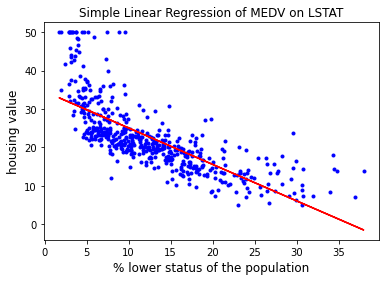

In [19]:
plt.title('Simple Linear Regression of MEDV on LSTAT')
plt.xlabel('% lower status of the population', fontsize=12)
plt.ylabel('housing value', fontsize=12)
plt.scatter(low_status, price, color='blue', marker='.')
plt.plot(low_status, reg.predict(low_status), color='red')

- Coefficient: For every increase by 1 unit in the % lower status of the population, the housing price is affected -0.95 times.
- Intercept: The housing price in the lowest presence of the % lower status of the population in the neighbourhood (1.73%) is 34.55 (in 1000s dollars).
- r2-score: 0.30323960520619875 (r2 = 1 - [total sum of square/total sum of squares of residuals]). So the closer this fraction is to zero, the better the prediction. Our model seems to perform in low-average. An r2 = -1 would indicate a bad model.
- mae: 4.506661807364621
- mse: 35.46090914574022

The model shows a strong negative corelation between the median housing price and % lower status of the population in the neighbourhood.

---

## Part 2: Histograms and Boxplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


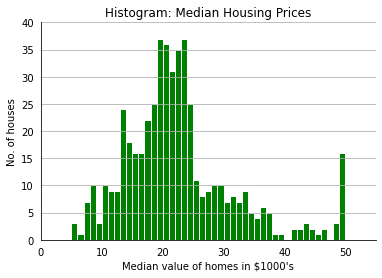

In [20]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

max = bdata.target.max()
min = bdata.target.min()

# plotting
plt.hist(bdata.target, bins=int(max-min) , facecolor='g', edgecolor='white')
plt.axis([min-5,max+5,0,40])
plt.xlabel("Median value of homes in $1000's")
plt.ylabel("No. of houses")
plt.title("Histogram: Median Housing Prices")

#polishing
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

plt.gca().yaxis.grid(True) # Add horizontal grid lines
plt.show()

### 2.2: Boxplot of housing prices

Create a **horizontal** boxplot that shows the distribution of the median value of houses (y-axis) that are adjacent to the Charles river and the houses that are not adjacent to the Charles rivers. Properly label your axes, and make sure that your graphic looks polished and professional.

Text(0, 0.5, 'proximity to Charles river')

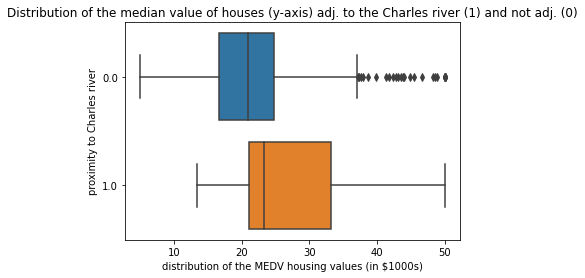

In [21]:
# Just switch x and y and add orientation to horizontal
sns.boxplot(y=boston["CHAS"], x=boston["MEDV"], orient="h")
plt.title('Distribution of the median value of houses (y-axis) adj. to the Charles river (1) and not adj. (0)')
plt.xlabel('distribution of the MEDV housing values (in $1000s)')
plt.ylabel('proximity to Charles river')

### 2.3: Interpret

What do you observe in the above boxplots? Explain in terms of the various elements of the distribution. Does there appear to be a difference between distribution of the median housing prices adjacent to Charles river and the ones not adjacent to Charles river? 

As we can notice from the boxplot above, the distribution of the median housing values of the neighbourhoods that are not adjacent to the Charles river have many outlies and is right-skewed. The presence of so many outliers means that this doesn't follow a uniform distribution. This actually makes sence, since the neighbourhoods that aren't adjacent to Charles river are located at very different parts of Boston. From the boxplots we can also notice that the intervals of MEDV in the neighborhoods non-adjacent to Charles, sit at a lower price point (approx. 3-37) as compared to their counterparts adjacent to Charles (from approx 13-50). This implies that the median housing value of the neighborhoods adjacent to Carles river are more expensive, which is also represented with the median line at the center of each boxplot (the blue one approx 22 and the orange one approx 24)

### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

<AxesSubplot:>

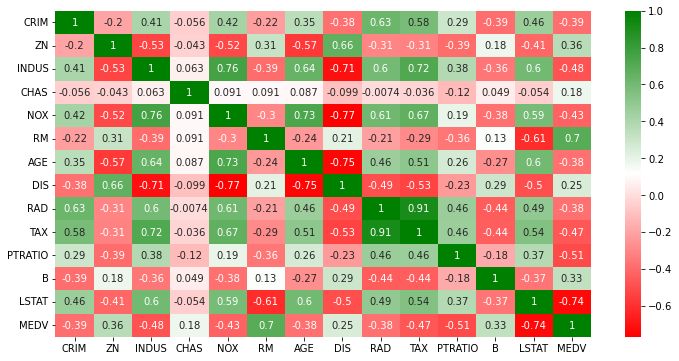

In [22]:
from  matplotlib.colors import LinearSegmentedColormap

cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
matplotlib.pyplot.figure(figsize=(12,6))
sns.heatmap(boston.corr(), annot=True, cmap=cmap)

2 most positively coorelated are:
- *RAD-TAX (0.91)*
- *INDUS-NOX (0.76)*

2 most negatively coorelated are:
- *NOX-DIS (-0.77)*
- *AGE-DIS (-0.75)*

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

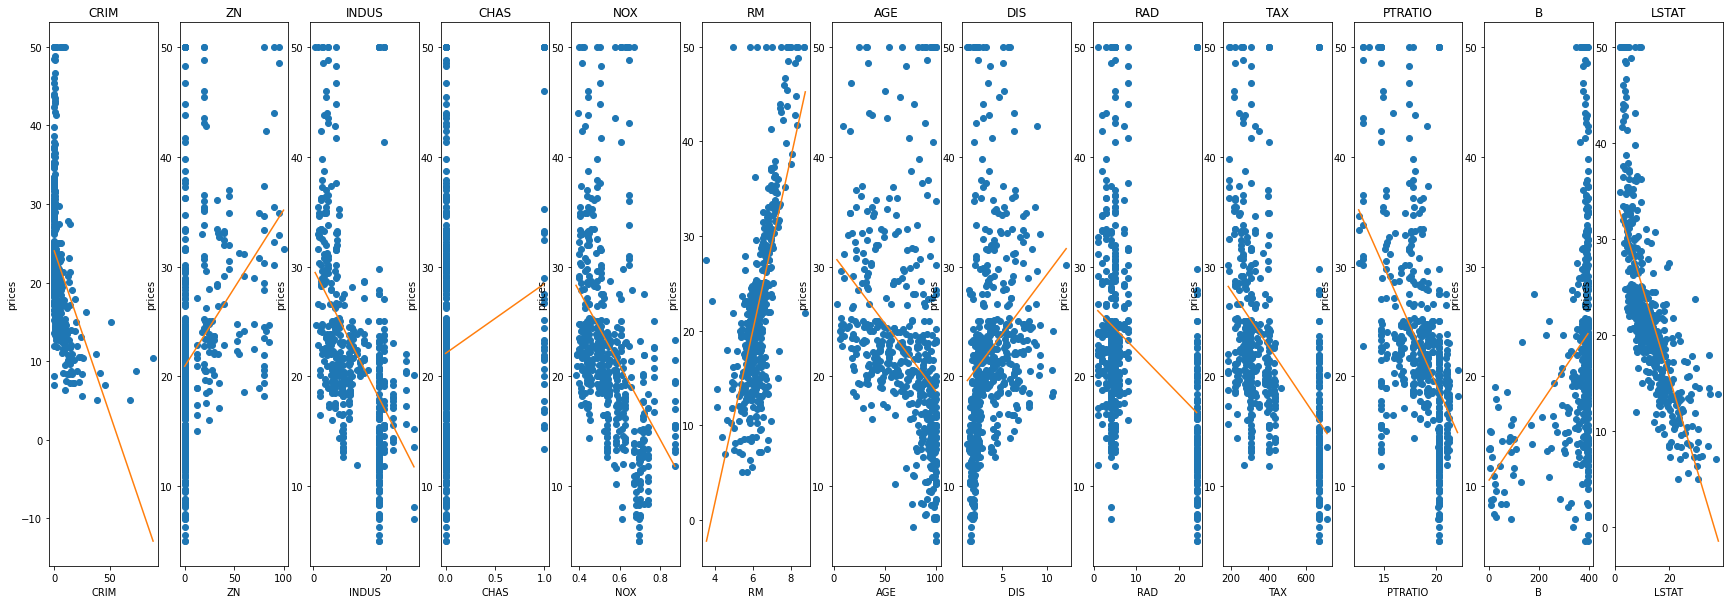

In [23]:
#A BIGGER PICTURE OF THE COORELATION OF THE FEATURES WITH THE TARGET, USING SIMPLE REGRESSION MODELS
# Using pyplot
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10))

# i: index
for i, col in enumerate(bdata.feature_names):
    # 13 plots here hence 1, 13
    plt.subplot(1, 13, i+1)
    x = boston[col]
    y = bdata.target
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')